# State Farm 
## Data Scientist Opening Pre-employment Assessment

### Exploratory Data Analysis

The problem that we are going to tackle is a supervised, classification machine learning problem. It’s supervised because we have both the features (data from x0 to x99) and the targets (y) that we want to predict and It's classification problem because the outputs of this prediction problem require to be classified into two classes ('0' and '1' or binary classification problem)

### Roadmap

Before we begin let's lay out a brief guide to keep us on track. The following steps form our machine learning workflow:

Step 0 - Data acquisition

Step 1 - Clean and prepare your data

Step 2 - Build your models

Step 3 - Generate predictions

Step 4 - Compare your modeling approaches

Step 5 - Submit your work

In [109]:
# Import necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8
%matplotlib inline

In [110]:
# Find the current working directory
os.getcwd()

'C:\\Users\\Mohsen\\Desktop\\StateFarm\\class_exercise_02'

In [111]:
# Set working directory to your desired working directory
os.chdir("C:/Users/Mohsen/Desktop/StateFarm/class_exercise_02")
os.getcwd()

'C:\\Users\\Mohsen\\Desktop\\StateFarm\\class_exercise_02'

In [112]:
# Set display options for pandas dataframe outputs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [113]:
# Set the style for seaborn ...
sns.set_style("whitegrid")

## Step 0 - Data acquisition

In [114]:
# Import train and test data
df_train = pd.read_csv("exercise_02_train.csv")
df_test = pd.read_csv("exercise_02_test.csv")

In [115]:
# Let's have a look at dataframe shape and data types
print(df_train.shape)
print(df_train.info())
print(df_train.dtypes)

(40000, 101)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB
None
x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24    float64
x25    float64
x26    float64
x27    float64
x28    float64
x29    float64
x30    float64
x31    float64
x32    float64
x33    float64
x34     object
x35     object
x36    float64
x37    float64
x38    float64
x39    float64
x40    float64
x41     object
x42    float64
x43    float64
x44    float64
x45     object
x46    float64
x47    float64
x48    float64
x49    float64
x50    float64
x51    float64
x52    float64
x53    float64
x5

In [116]:
# Check a few first rows of the train dataframe
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.198560,74.425320,67.627745,-3.095111,-6.822327,19.048071,-0.362378,-10.699174,-22.699791,-1.561262,1.148618,-3.043351,-3.896558,2.170615,6.366298,-7.340866,0.267735,1.081311,-15.236885,1.159306,-27.961682,11.829013,43.295583,-0.880307,-4.518688,3.271091,0.103514,31.646894,2.901849,-0.163627,-2.131994,-8.460728,-2.411500,-7.350110,Toyota,wed,1.423590,-10.839200,-3.366516,15.494000,4.550518,$449.48,-44.019138,0.890008,-104.388382,0.0%,-11.341865,0.453917,2.800111,5.691806,35.782510,-22.567429,-0.199237,0.871391,5.808162,-1.467897,34.030184,56.125748,2.078396,-0.307610,4.629103,14.791115,-4.087323,4.036426,-1.533861,1.261707,59.935463,0.643823,Jun,-31.391165,41.040206,8.616496,9.529082,-18.001886,-5.775643,40.617107,1.965695,-50.663141,4.554055,-7.495833,-46.690744,6.481538,4.635831,1.885149,0.784681,0.556071,-0.103677,11.068765,-1.405188,-1.960280,-155.442237,0.800948,1.553846,asia,-1.093926,16.202557,26.238591,-2.125570,9.644466,1.237667,0
1,-29.662621,24.320711,-48.205182,1.430339,-6.552206,4.263074,6.551412,4.265483,1.245095,2.246814,-75.745489,4.817071,11.744015,1.379990,6.226372,0.042640,2.354558,-8.940383,19.741290,17.559436,9.841718,-12.457077,15.719526,8.212825,1.067061,7.119592,-0.009653,-45.402701,-3.751504,-1.451099,2.133355,-6.947286,-1.789253,2.620869,Honda,wed,1.662058,57.917006,-5.124272,6.240581,-9.476135,$-525.06,-9.931499,-6.068047,-65.535823,0.0%,6.991817,-0.822274,-2.179103,-3.913326,-5.301997,6.334988,-0.537955,-26.899104,-2.643015,-2.401239,-49.979634,75.093515,-2.696257,8.011070,1.911671,4.511355,3.297596,-4.809269,12.176704,0.395125,-42.651072,-3.473815,sept.,8.681870,36.204784,-25.515410,-3.703719,16.169398,-44.023601,-49.303165,0.727415,-17.648950,6.011168,-15.538136,-20.116032,4.061026,1.386698,-0.333381,2.069130,5.047461,-0.702813,3.512072,4.240518,7.242614,-73.365593,2.031707,7.544422,asia,-3.659541,29.674259,-15.141647,-36.030599,5.820376,1.952183,1
2,15.493759,-66.160459,50.512903,-2.265792,14.428578,2.509323,-6.707536,3.820842,-11.100833,-1.459825,0.880971,-6.172156,-19.037250,-2.960048,-2.891082,1.261521,-1.797489,-0.614719,25.529246,22.418811,7.281959,51.966010,-10.832756,-0.945138,-0.246806,0.366805,0.524702,-7.127528,-1.176779,0.618480,-0.976925,1.285019,-4.361560,-5.322576,bmw,wed,0.472357,-12.991058,-5.436794,-11.649682,6.876065,$-599.5,7.811114,0.810979,4.719628,0.01%,11.820068,-1.726897,-3.818956,-3.393137,-0.752157,-18.293115,0.453022,7.582964,-7.694299,-3.290344,15.147122,-25.890598,-2.417447,-6.241584,3.317208,1.007183,-2.416567,16.889265,-7.112369,0.256450,-9.555651,3.430571,Oct,31.141879,49.538602,17.438890,2.269528,-24.340106,-29.972499,-19.706659,-10.026766,-30.165994,0.671222,-6.744114,24.297364,3.199586,-3.318213,9.341546,-12.252531,-19.567739,0.683658,3.371148,2.423319,1.740493,-23.433184,-0.992474,1.385799,america,1.299144,33.018090,-19.914894,26.212736,2.372690,0.558988,1
3,-19.837651,33.210943,53.405563,1.079462,11.364251,-1.064581,9.308857,9.266076,14.552959,-2.012755,27.643905,7.390939,20.819180,6.128592,1.510900,-8.126781,2.058786,5.796101,53.029270,-16.178983,13.823307,30.155518,12.922670,6.564312,2.556431,-5.940073,0.393260,18.953604,-6.196459,-1.268807,-7.715012,-1.103812,-0.798582,0.373065,volkswagon,wed,-0.092740,37.658926,5.675375,10.521885,-16.933984,$-220.71,13.446385,-0.463123,26.053787,-0.0%,14.589547,-5.274261,-5.130263,-11.731410,19.436813,3.045527,-1.673585,-15.738437,-4.648301,-0.075231,34.361817,24.494322,4.443710,-6.963565,-0.226945,-12.910941,-1.567731,-21.680531,0.037226,-1.000424,18.549158,-0.035583,Jun,-13.934322,82.130387,-2.441103,-3.410051,-2.048109,-7.937655,-7

In [117]:
# Check summary statistics of the train data
df_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39989.000000,39990.000000,39992.000000,39991.000000,39992.000000,39994.000000,39990.000000,39991.000000,39994.000000,39993.000000,39991.000000,39993.000000,39989.000000,39986.000000,39997.000000,39996.000000,39993.000000,39988.000000,39986.000000,39992.000000,39995.000000,39987.000000,39994.000000,39992.000000,39986.000000,39989.000000,39991.000000,39992.000000,39989.000000,39995.000000,39996.000000,39992.000000,39996.000000,39990.000000,39993.000000,39996.000000,39994.000000,39991.000000,39994.000000,39988.000000,39998.000000,39998.000000,39993.000000,39996.000000,39990.000000,39997.000000,39993.000000,39989.000000,39992.000000,39994.000000,39995.000000,39989.000000,39989.000000,39992.000000,39991.000000,39990.000000,39988.000000,39993.000000,39987.000000,39986.000000,39995.000000,39988.000000,39991.000000,39991.000000,39987.000000,39995.000000,39995.000000,39992.000000,39988.000000,39993.000000,39990.000000,39990.000000,39991.000000,39993.000000,39994.000000,39991.000000,39996.000000,39992.000000,39995.000000,39997.000000,39986.000000,39989.000000,39996.000000,39996.000000,39989.000000,39993.000000,39996.000000,39993.000000,39992.000000,39992.000000,39985.000000,39987.000000,39994.000000,39987.000000,40000.00000
mean,3.446069,-7.788884,1.706058,-0.072972,0.123077,-0.608624,0.035576,-0.052651,-2.909764,-0.024265,7.549425,0.019432,-4.462099,-0.004919,0.003959,0.012312,-0.036433,-0.029770,6.691661,0.089983,3.126539,6.595176,-1.978926,-0.047140,0.016727,0.018203,-0.000020,9.519717,-0.020416,0.001264,-0.021800,0.042595,0.008156,-0.686944,0.002661,4.814694,0.000465,0.055935,1.849224,-0.536203,-0.045985,-21.624920,0.028074,-0.002593,0.033240,0.042867,3.813595,-6.534850,-0.001244,0.091197,-0.049297,0.044937,-1.489671,0.078376,-0.892583,-0.015664,-0.000589,0.021772,-0.031868,-2.673378,-0.001751,-0.012638,-2.296022,-0.009198,-7.435962,6.884965,0.218146,-1.578681,-5.047239,0.188334,5.417519,0.013080,-0.211191,-0.696421,1.154120,-0.021449,-0.020009,0.017046,0.207667,-0.004143,-3.638630,-0.000454,-0.001596,-0.003088,0.024164,-9.002636,-0.001751,-0.005731,-0.014064,-0.095040,-0.807556,-2.514305,0.038370,0.043218,0.20360
std,16.247547,37.014862,38.385085,1.503243,16.289994,15.585122,9.041371,6.953403,13.149006,2.939895,40.664588,4.448199,17.951827,2.540264,3.103144,8.675020,4.061350,6.574531,27.595549,20.928682,16.367396,35.681204,37.869496,7.536143,3.749795,3.974749,0.556269,40.218989,2.880450,0.848830,3.263177,5.784880,1.618784,3.511079,1.664446,31.562732,7.539899,9.804733,34.779579,21.821593,15.064408,87.307407,8.316390,4.499535,3.685152,12.796690,20.147464,37.168587,0.989515,24.571744,5.080191,3.540124,29.948901,35.389688,6.320181,6.062008,5.556303,14.910582,7.420361,13.872299,7.830538,1.249439,38.482628,3.778584,67.441966,37.413568,35.701798,7.860588,27.267244,27.206264,35.658089,5.597683,34.667419,4.003250,22.104004,19.211624,9.781479,5.316122,4.965192,5.222323,18.383605,0.588700,8.334879,3.819319,4.107623,96.666843,2.626840,4.605320,2.166326,27.516763,23.836194,18.554646,8.450995,1.114444,0.40268
min,-60.113902,-157.341119,-163.339956,-6.276969,-61.632319,-62.808995,-35.060656,-26.736717,-53.735586,-11.497395,-170.569286,-17.846688,-78.365573,-10.825818,-12.752781,-35.468910,-17.734781,-25.737710,-103.958784,-84.212286,-72.672625,-145.361298,-162.276499,-34.424915,-14.714775,-15.659026,-2.322048,-143.036594,-11.601180,-3.580745,-14.375368,-23.830565,-6.759871,-16.230668,-6.758756,-127.651997,-30.454493,-37.738440,-141.837976,-109.444756,-61.803235,-423.119841,-34.361946,-18.655985,-14.618656,-54.269324,-78.220574,-167.271667,-3.902567,-90.810652,-20.396940,-15.9283

## Step 1 - Clean and prepare your data

As you can see the volume of dataset is huge and finding anomalies/outliers just by looking at the values is almost impossible. In this case, data visulization would be a great help in getting insigths from our dataset and consequently cleaning and preparing data.

In [118]:
# First check the number of missing values

print("The number of missing values in total is: {}".format(df_train.isnull().sum().sum()))

The number of missing values in total is: 818


In [119]:
# Number of missing values for each feature from x0 to x99
# There is no missing value for target variable 'y'. last value in temp_list is equal to zero.

temp_list = []
for i in df_train.isnull().sum():
    temp_list.append(i)
    
print(temp_list, "\n")
print("The length of temp_list is: {}".format(len(temp_list)))
print("The maximum of missing values for a feature is: {}".format(max(temp_list[:-1])))
print("The minimum of missing values for a feature is: {}".format(min(temp_list[:-1])))

[11, 10, 8, 9, 8, 6, 10, 9, 6, 7, 9, 7, 11, 14, 3, 4, 7, 12, 14, 8, 5, 13, 6, 8, 14, 11, 9, 8, 11, 5, 4, 8, 4, 10, 7, 13, 7, 4, 6, 9, 6, 4, 12, 2, 2, 5, 7, 4, 10, 3, 7, 11, 8, 6, 5, 11, 11, 8, 9, 10, 12, 7, 13, 14, 5, 12, 9, 9, 8, 13, 5, 5, 8, 12, 7, 10, 10, 9, 7, 6, 9, 4, 8, 5, 3, 14, 11, 4, 4, 11, 7, 4, 7, 7, 8, 8, 15, 13, 6, 13, 0] 

The length of temp_list is: 101
The maximum of missing values for a feature is: 15
The minimum of missing values for a feature is: 2


In [120]:
# How many rows we loss, if we drop all the rows with any missing values?
print(40000 - df_train.dropna(how='any').shape[0])

818


The number of the total missing values and the number of intended dropped rows are equal, therefore there is no any row with more than one missing value. In this case if we drop rows it means we lose a lot of information although proportion of dropped rows (if we do that) to the total rows is 2.04% and it won't affect on the distribution of each feature. 
There are different ways to compensate for missing data. 

In this work, I use Mean for numerical and Mode for categorical data imputation because distribution of data for each numerical feature is normal and therefore using Mean and Mode would be a reasonable solution to handle missing values problem.

In [121]:
# List of numerical features of train dataframe
temp_list = list(df_train.columns.values)

unwanted = ['x34', 'x35', 'x41', 'x45', 'x68', 'x93', 'y']
for i in unwanted:
    temp_list.remove(i)
len(temp_list)

94

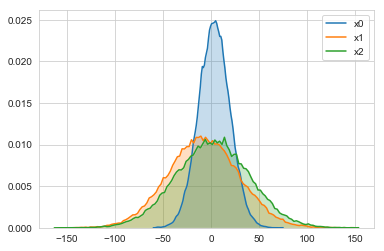

In [122]:
# Distribution of first 3 features of train dataset (x0, x1, x2)

for i in range(3):
    sns.kdeplot(df_train[temp_list[i]], shade=True, cbar = True, bw = 1, cut = 0, legend=True)

In [123]:
# Filling the missing values with Mean for each numerical feature
for i in temp_list:
    df_train[i].fillna(value = df_train[i].mean(), inplace = True)

In [124]:
# Check the number of missing values for categorical data
print("The number of missing values in categorical features is: {}".format(df_train.isnull().sum().sum()))

The number of missing values in categorical features is: 44


In [125]:
# Filling missing values with Mode for each categorical features
unwanted = ['x34', 'x35', 'x41', 'x45', 'x68', 'x93', 'y']
unwanted.remove('y')

for i in unwanted:
    df_train[i].fillna(value = df_train[i].mode()[0], inplace = True)

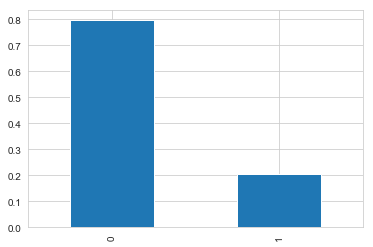

In [126]:
# Check the target data
df_train['y'].value_counts(normalize = True).plot(kind = 'bar')

20 percent of the target data is positive and 80 percent is null. It shows the skewness (asymmetry) of the distribution of the target variable about its mean. 

In [127]:
# Check categorical data, analyze and clean them if it's necessary
df_train['x34'].value_counts()

volkswagon    12462
Toyota        11079
bmw            7282
Honda          5179
tesla          2248
chrystler      1219
nissan          334
ford            159
mercades         27
chevrolet        11
Name: x34, dtype: int64

count          40000
unique            10
top       volkswagon
freq           12462
Name: x34, dtype: object 

volkswagon    0.311550
Toyota        0.276975
bmw           0.182050
Honda         0.129475
tesla         0.056200
chrystler     0.030475
nissan        0.008350
ford          0.003975
mercades      0.000675
chevrolet     0.000275
Name: x34, dtype: float64 



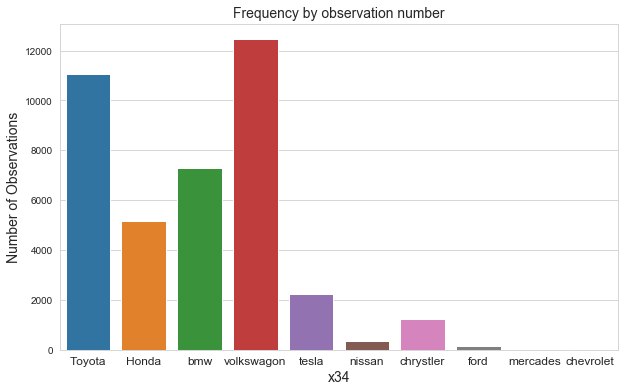

In [146]:
rcParams['figure.figsize'] = 10, 6


print(df_train['x34'].describe(), "\n")
print(df_train['x34'].value_counts(normalize = True), "\n")

ax = sns.countplot(x="x34", data=df_train)

plt.xticks(fontsize=12)
plt.title("Frequency by observation number", fontsize=14)
plt.xlabel("x34", fontsize=14)
plt.ylabel("Number of Observations", fontsize=14);

Feature x34 is skewed. 5 car brands (Toyota, Honda, bmw, volkswagon and tesla) have more than 94 percent of observations while the rest 5 companies only have less than 6 percent of observations, therefore this feature potentially would be very informative and we consider it for training the model.

y              0     1
x34                   
Honda       4122  1057
Toyota      8808  2271
bmw         5802  1480
chevrolet     10     1
chrystler    982   237
ford         124    35
mercades      23     4
nissan       267    67
tesla       1810   438
volkswagon  9908  2554


Text(0.5, 0, 'x34')

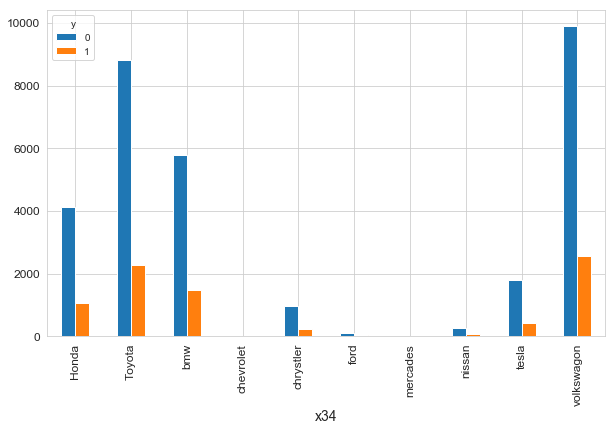

In [149]:
# Cross table of feature x34 and target variable
df1 = pd.crosstab(df_train['x34'], df_train['y'])
print(df1)
df1.plot(kind = 'bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x34", fontsize=14)


In [153]:
# Feature x35 needs to be cleaned, Because we have duplicates and those will cause confusions in training and testing.
print(df_train['x35'].unique())
print(df_train['x35'].nunique())

['wed' 'thurday' 'wednesday' 'thur' 'tuesday' 'monday' 'friday' 'fri']
8


In [159]:
# Cleaning feature x35
df_train['x35'] = df_train['x35'].map({'monday' : 'monday', 'tuesday': 'tuesday','wed': 'wednesday','wednesday':'wednesday',
                     'thur':'thurday','thurday':'thurday', 'friday':'friday', 'fri':'friday'})

In [160]:
# This feature is also skewed towards two days of the week and potentially would be very informative for our prediction
print(df_train['x35'].value_counts())

wednesday    20726
thurday      17758
tuesday        894
friday         561
monday          61
Name: x35, dtype: int64


y              0     1
x35                   
friday       466    95
monday        35    26
thurday    14701  3057
tuesday      583   311
wednesday  16071  4655


Text(0.5, 0, 'x35')

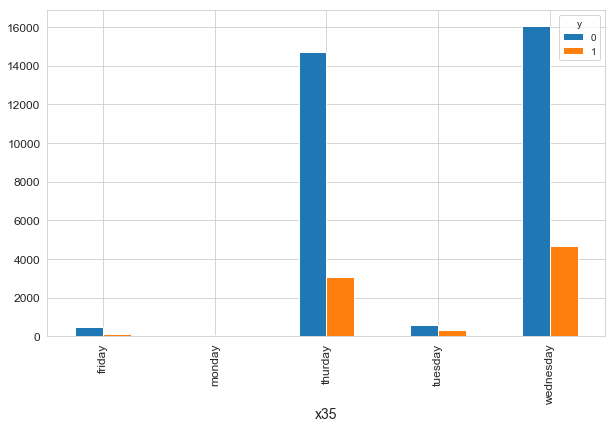

In [161]:
# Cross table of feature x35 and target variable
# As you can see in the following figure the proportion of target variables '0' and '1' to the total aren't 80% and 20% for..
# ..all cases

df2 = pd.crosstab(df_train['x35'], df_train['y'])
print(df2)
df2.plot(kind = 'bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x35", fontsize=14)

Text(0.5, 0, 'x41')

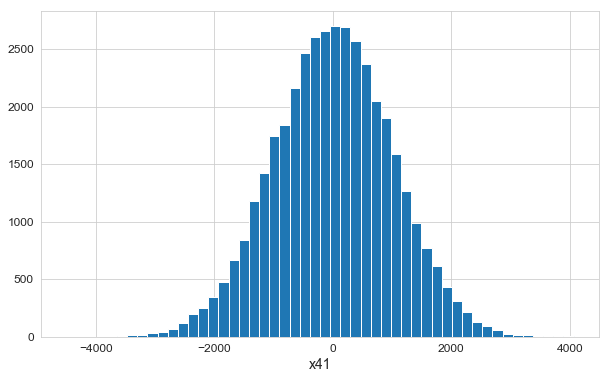

In [167]:
# Clean the feature x41. Check its distibution and summary statistics
df_train['x41'] = df_train['x41'].replace('[\$,]', '', regex=True).astype(np.float)

df_train['x41'].hist(bins=50)
df_train['x41'].describe()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("x41", fontsize=14)

The distibution of feature x41 is normal, thus we can use this feature in our feature scaling along with other numerical features in order to reduce the dimentionality of the features using PCA (Principal Component Analysis)

count      40000
unique        10
top       -0.01%
freq        9583
Name: x45, dtype: object


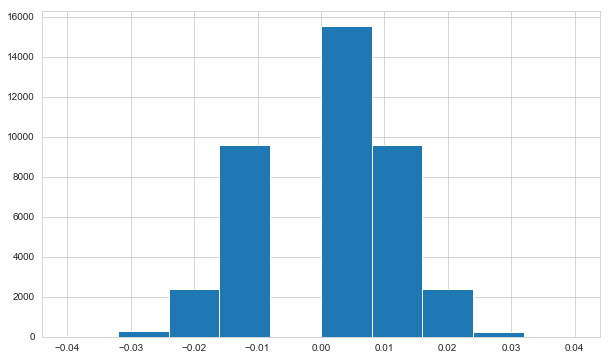

In [173]:
# Check the feature x45 and have a look at its distribution
print(df_train['x45'].describe())
df_train['x45'].value_counts(normalize = True)

df3 = df_train['x45'].replace('[\%,]', '', regex=True).astype(np.float)
df3.hist()


Looking at the distribution of feature x45 indicates that we don't need to add complexity to our model by considering this feature as a categorical varibale. Its distibution has a nice bell shape which means it has normal distibution

In [177]:
# Converting to numerical feature
df_train['x45'] = df3

In [181]:
# Check feature x68
print(df_train['x68'].unique())
print(df_train['x68'].nunique())
print(df_train['x68'].describe())


['Jun' 'sept.' 'Oct' 'July' 'Aug' 'Apr' 'May' 'Mar' 'Nov' 'Feb' 'Dev'
 'January']
12
count     40000
unique       12
top        July
freq      11088
Name: x68, dtype: object


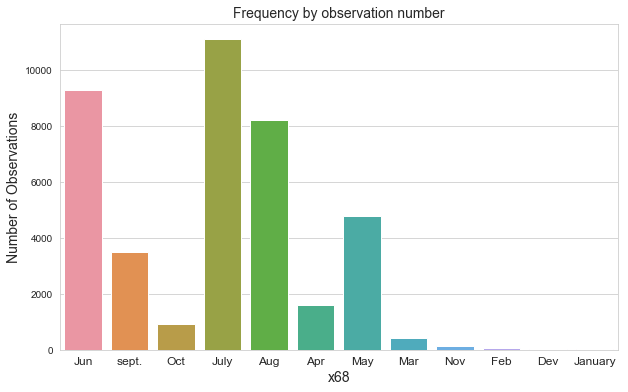

In [182]:
# This feature has an asymetric distribution, therefore due to the skewness of target data, ...
# ... this feature would be potentially very informative

ax = sns.countplot(x="x68", data=df_train)

plt.xticks(fontsize=12)
plt.title("Frequency by observation number", fontsize=14)
plt.xlabel("x68", fontsize=14)
plt.ylabel("Number of Observations", fontsize=14);

In [188]:
# Check the feature x93
print(df_train['x93'].unique(), "\n")
print(df_train['x93'].describe(), "\n")
print(df_train['x93'].value_counts())

['asia' 'america' 'euorpe'] 

count     40000
unique        3
top        asia
freq      35423
Name: x93, dtype: object 

asia       35423
america     3131
euorpe      1446
Name: x93, dtype: int64


y               0         1
x93                        
america  0.061275  0.017000
asia     0.706000  0.179575
euorpe   0.029125  0.007025


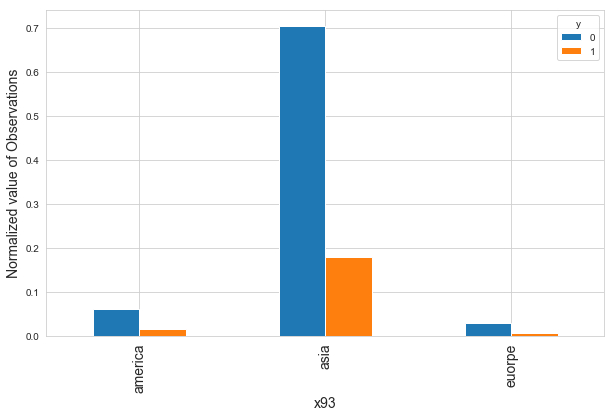

In [192]:
# Cross table of feature x93 and target variable
df4 = pd.crosstab(df_train['x93'], df_train['y'], normalize = True)
print(df4)
df4.plot(kind = 'bar')
plt.xticks(fontsize=14)
plt.xlabel("x93", fontsize=14)
plt.ylabel("Normalized value of Observations", fontsize=14);

In [193]:
# Exclude features x34, x35, x68, x93 and y from the df_train dataset and then create new training plus label dataframes

df_train_2 = df_train.drop(['x34','x35','x68','x93','y'], axis = 1)

96 numerical features are alot of features. Using all of them makes our training process very time consuming and sometimes gives us memory error. Moreover overfiting is another problem if we use all the features. In that case we lose generality of the model and in evaluation process we get weaker response from our model.

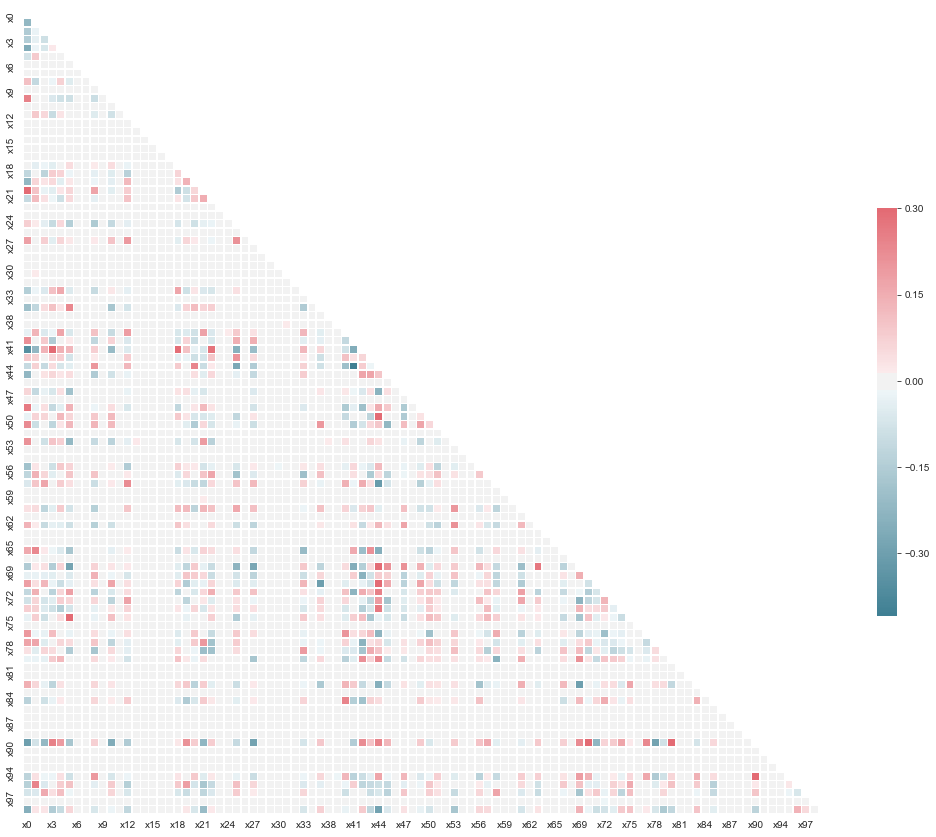

In [214]:
# Let's visually check how much these 96 features are correlated
# Generate a mask for the upper triangle

corrmat = df_train_2.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels = 3, yticklabels = 3)

(array([-400., -300., -200., -100.,    0.,  100.,  200.,  300.,  400.]),
 <a list of 9 Text yticklabel objects>)

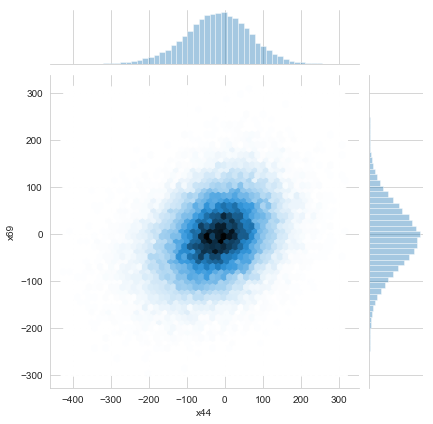

In [220]:
# It seems the correlation between x44 and x69 is the highest positive correlation. Let have a closer look at it
sns.jointplot(x = df_train_2.x44, y=df_train_2.x69, kind = 'hex')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [223]:
# Now let's use One-hot Encoding method to create vectors for categorical data
x34_dummies = pd.get_dummies(df_train.x34, prefix = 'x34').iloc[:,1:]
x35_dummies = pd.get_dummies(df_train.x35, prefix = 'x35').iloc[:,1:]
x68_dummies = pd.get_dummies(df_train.x68, prefix = 'x68').iloc[:,1:]
x93_dummies = pd.get_dummies(df_train.x93, prefix = 'x93').iloc[:,1:]

In [224]:
# Then concatenate dummies to the end of df_train_2 and make a new_df_train
new_df_train = pd.concat([df_train_2, x34_dummies, x35_dummies, x68_dummies, x93_dummies], axis = 1)

In [226]:
new_df_train.shape

(40000, 122)

## Step 2 - Build your models

## "Random Forest" & "Deep Neural Network" 
### Two different techniques to make my models

In [227]:
# Now we have our data cleaned and ready to be processed. The number of features are very high and we need to reduce the
# dimentionality of the model. To do that we use PCA. Let's not forget PCA is desinged for continuous variables.

# Separating out the features (from One-hot Encoded vectors)
x = df_train_2.values

# Separating out the target
y = df_train.loc[:,['y']].values

In [229]:
x.shape

(40000, 96)

In [231]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [309]:
# Import Principal Component Analysis module
from sklearn.decomposition import PCA

In [310]:
# Create new dataframe based on pca analysis
pca = PCA()
pc_1 = pca.fit_transform(x)
pc_2 = pca.fit(x)
pc_df = pd.DataFrame(data = pc_1)

In [318]:
temp_list = pc_2.explained_variance_ratio_
sum = 0
for i in range(50):
    sum += temp_list[i]
print("Summation of first 50 variance ration of features is: {}".format(sum))

Summation of first 50 variance ration of features is: 0.6904146090958235


As you can see, in this case PCA isn't very effective on reducing the dimensionality of the dataset. It shows that features
are highly independent from each other and each one is important in our model prediction, so I decided to go with full features.

In [237]:
# PCA analyzed features
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,2.934307,0.130526,1.994813,-1.737767,-0.788286,-0.128714,4.168353,1.604308,-0.266136,0.019575,0.308763,2.029537,-1.717294,0.854586,-0.702122,-1.175707,0.497911,-0.257500,-0.708868,-0.087382,-0.663674,0.630354,-0.267610,-0.833851,1.657597,1.518711,-1.314558,-0.076550,-0.457596,-0.587069,0.444978,-0.562539,-1.296150,0.226892,0.167506,-0.426448,0.832221,-1.384680,-1.263776,-0.866617,0.687250,-0.893471,0.349164,0.360440,-0.558584,0.037691,-0.969655,0.972257,-0.852792,0.207143,-1.333808,-0.090761,-0.039625,0.163443,-0.402607,-0.339167,0.124494,-1.150805,1.013558,1.332150,0.880189,-1.705690,-0.032837,0.432315,-0.948161,-0.316322,-1.402945,1.907802,1.525669,0.334159,-0.639314,-0.080489,-0.526568,-0.636774,-0.341061,0.406248,0.312231,-0.047224,0.164303,-0.006639,0.811849,1.023841,-0.691951,-0.665820,-1.037699,0.392514,-0.043535,0.212652,0.010625,0.719059,-0.035410,0.129143,-0.080467,-0.053992,-0.000417,-0.001874
1,-1.129400,-1.339661,-0.543330,-1.305405,0.002134,-1.308545,1.398551,0.483087,0.277006,1.437263,1.989164,-0.330408,0.493475,-2.802246,-1.001854,-0.391625,-1.543709,-0.982364,0.190988,-0.522672,-0.645480,-0.759474,-0.847392,-0.449788,-0.316645,0.921591,0.030377,-1.529970,0.215358,-0.202929,-0.662193,-2.055964,0.571695,-0.562059,-2.155654,-0.823106,0.503209,-1.942342,0.195308,0.164850,0.078343,-1.558140,-0.987521,-1.338821,-1.144441,-0.708364,-0.779375,0.099874,-0.538536,0.342579,0.156542,-0.990335,0.135627,0.091134,1.625913,1.470926,-1.721440,-0.563120,1.420812,0.395129,-0.241041,-0.896798,0.345229,-0.833790,-0.457866,0.229012,-0.624013,-1.080201,-1.035296,-1.253643,-1.041410,0.725440,-2.181671,0.951987,-2.573091,-0.304967,0.609162,-0.085671,0.991977,-0.271864,0.329231,0.205397,1.738854,-0.801990,-0.040674,-0.383615,0.709141,0.023324,0.644496,-0.220468,-0.813759,-0.541754,-0.065563,-0.050571,0.000301,-0.000352
2,-0.459846,0.665967,-0.651390,0.049387,-0.581259,0.031172,-0.831394,-0.133048,-1.026936,0.704422,0.543815,0.740870,-0.625101,0.440959,-2.535139,-0.911235,0.579644,0.754426,-1.000895,-0.681525,-0.508407,-1.019717,0.241407,0.130217,0.842875,-0.570751,0.499229,0.428842,-0.254717,0.267769,0.716795,-0.171250,-1.905660,-1.078827,-0.669174,0.594855,-1.316749,-1.476880,0.500287,-0.338832,0.212455,-0.790692,-0.858187,0.462158,-0.318696,1.476363,1.750282,-0.779795,0.896268,-0.785004,-0.266493,0.698891,-0.306445,0.218700,-0.252954,-1.020704,-0.019908,-0.630340,-1.160446,0.322746,-1.301803,1.245062,1.491878,-0.441815,0.816248,-0.439347,2.934285,1.384642,1.544836,1.417988,-0.525470,-0.684655,0.697903,0.121815,1.300170,1.091382,1.154385,0.436940,-0.720367,0.261556,0.249456,0.655221,0.616535,-0.894730,1.387864,-0.614554,-0.212550,0.268470,0.158792,0.184040,0.366417,-0.380758,0.515026,-0.086304,-0.000246,0.000245
3,-1.812759,-1.134854,1.477236,0.005454,0.120822,-1.768903,0.126069,-1.356769,1.796485,0.137111,-1.185783,-0.747983,-1.934324,0.234809,0.061359,-0.527661,0.523987,0.372561,-1.144060,2.140290,-0.550956,-0.594863,-0.143006,1.037222,0.714343,0.958303,-1.326043,-0.902187,-0.021301,-0.508313,-0.336919,-1.170841,0.923797,-0.991947,0.308168,-1.239538,-1.949666,-0.295227,0.322096,-0.037413,-0.697713,1.153932,-0.937275,-2.940173,0.107876,-0.499081,1.761387,-0.700558,0.922412,-0.281547,-1.683415,-0.788038,-1.478612,-0.767019,0.527951,0.587398,-0.839102,0.363478,2.085594,-0.222843,2.294561,-0.579014,0.871841,-0.088124,0.530250,0.059812,0.622920,-0.363993,0.329315,-0.628112,-0.896953,-0.379010,0.694006,0.715554,0.211057,-1.268998,0.722941,-0.443678,0.882093,-0.130475,1.052867,0.049972,0.157687,-0.231287,-0.098247,-0.834642,0.986057,-0.261756,-0.146655,0.154490,-0.503933,-0.016378,0.035580,0.070750,0.000563,-0.000256
4,-0.714019,1.321397,-0.455528,1.902396,1.34296

In [238]:
# Let's add One-hot Encoded vectors to the begining of pc_df 
X = pd.concat([new_df_train.iloc[:,97:], pc_df], axis = 1)

In [241]:
# Let's have look at X
X.head()

,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_monday,x35_thurday,x35_tuesday,x35_wednesday,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_asia,x93_euorpe,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,2.934307,0.130526,1.994813,-1.737767,-0.788286,-0.128714,4.168353,1.604308,-0.266136,0.019575,0.308763,2.029537,-1.717294,0.854586,-0.702122,-1.175707,0.497911,-0.257500,-0.708868,-0.087382,-0.663674,0.630354,-0.267610,-0.833851,1.657597,1.518711,-1.314558,-0.076550,-0.457596,-0.587069,0.444978,-0.562539,-1.296150,0.226892,0.167506,-0.426448,0.832221,-1.384680,-1.263776,-0.866617,0.687250,-0.893471,0.349164,0.360440,-0.558584,0.037691,-0.969655,0.972257,-0.852792,0.207143,-1.333808,-0.090761,-0.039625,0.163443,-0.402607,-0.339167,0.124494,-1.150805,1.013558,1.332150,0.880189,-1.705690,-0.032837,0.432315,-0.948161,-0.316322,-1.402945,1.907802,1.525669,0.334159,-0.639314,-0.080489,-0.526568,-0.636774,-0.341061,0.406248,0.312231,-0.047224,0.164303,-0.006639,0.811849,1.023841,-0.691951,-0.665820,-1.037699,0.392514,-0.043535,0.212652,0.010625,0.719059,-0.035410,0.129143,-0.080467,-0.053992,-0.000417,-0.001874
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,-1.129400,-1.339661,-0.543330,-1.305405,0.002134,-1.308545,1.398551,0.483087,0.277006,1.437263,1.989164,-0.330408,0.493475,-2.802246,-1.001854,-0.391625,-1.543709,-0.982364,0.190988,-0.522672,-0.645480,-0.759474,-0.847392,-0.449788,-0.316645,0.921591,0.030377,-1.529970,0.215358,-0.202929,-0.662193,-2.055964,0.571695,-0.562059,-2.155654,-0.823106,0.503209,-1.942342,0.195308,0.164850,0.078343,-1.558140,-0.987521,-1.338821,-1.144441,-0.708364,-0.779375,0.099874,-0.538536,0.342579,0.156542,-0.990335,0.135627,0.091134,1.625913,1.470926,-1.721440,-0.563120,1.420812,0.395129,-0.241041,-0.896798,0.345229,-0.833790,-0.457866,0.229012,-0.624013,-1.080201,-1.035296,-1.253643,-1.041410,0.725440,-2.181671,0.951987,-2.573091,-0.304967,0.609162,-0.085671,0.991977,-0.271864,0.329231,0.205397,1.738854,-0.801990,-0.040674,-0.383615,0.709141,0.023324,0.644496,-0.220468,-0.813759,-0.541754,-0.065563,-0.050571,0.000301,-0.000352
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.459846,0.665967,-0.651390,0.049387,-0.581259,0.031172,-0.831394,-0.133048,-1.026936,0.704422,0.543815,0.740870,-0.625101,0.440959,-2.535139,-0.911235,0.579644,0.754426,-1.000895,-0.681525,-0.508407,-1.019717,0.241407,0.130217,0.842875,-0.570751,0.499229,0.428842,-0.254717,0.267769,0.716795,-0.171250,-1.905660,-1.078827,-0.669174,0.594855,-1.316749,-1.476880,0.500287,-0.338832,0.212455,-0.790692,-0.858187,0.462158,-0.318696,1.476363,1.750282,-0.779795,0.896268,-0.785004,-0.266493,0.698891,-0.306445,0.218700,-0.252954,-1.020704,-0.019908,-0.630340,-1.160446,0.322746,-1.301803,1.245062,1.491878,-0.441815,0.816248,-0.439347,2.934285,1.384642,1.544836,1.417988,-0.525470,-0.684655,0.697903,0.121815,1.300170,1.091382,1.154385,0.436940,-0.720367,0.261556,0.249456,0.655221,0.616535,-0.894730,1.387864,-0.614554,-0.212550,0.268470,0.158792,0.184040,0.366417,-0.380758,0.515026,-0.086304,-0.000246,0.000245
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,-1.812759,-1.134854,1.477236,0.005454,0.120822,-1.768903,0.126069,-1.356769,1.796485,0.137111,-1.185783,-0.747983,-1.934324,0.234809,0.061359,-0.527661,0.523987,0.372561,-1.144060,2.140290,-0.550956,-0.594863,-0.143006,1.037222,0.714343,0.958303,-1.326043,-0.902187,-0.021301,-0.508313,-0.336919,-1.170841,0.923797,-0.991947,0.308168,-1.239538,-1.949666,-0.295227,0.322096,-0.037413,-0.697713,1.153932,-0.937275,-2.940173,0.107876,-0.499081,1.761387,-0.700558,0.922412,-0.281547,-1.683415,-0.788038,-1.478

## Random Forest

In [242]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [243]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [246]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with different number of decision trees to find the best number of estimators (model tuning)
rf_1 = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf_2 = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_3 = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_4 = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf_5 = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf_6 = RandomForestClassifier(n_estimators = 1000, random_state = 42)


In [247]:
# Train the models on training data
rf_1.fit(X_train, y_train)
rf_2.fit(X_train, y_train)
rf_3.fit(X_train, y_train)
rf_4.fit(X_train, y_train)
rf_5.fit(X_train, y_train)
rf_6.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [248]:
# Use the forest's predict method on the test data
y_pred_1 = rf_1.predict(X_test)
y_pred_2 = rf_2.predict(X_test)
y_pred_3 = rf_3.predict(X_test)
y_pred_4 = rf_4.predict(X_test)
y_pred_5 = rf_5.predict(X_test)
y_pred_6 = rf_6.predict(X_test)

In [255]:
# Import necessary libraries and modules for statistical inference
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

In [262]:
acc_1 = accuracy_score(y_test, y_pred_1, normalize=False)
acc_2 = accuracy_score(y_test, y_pred_2, normalize=False)
acc_3 = accuracy_score(y_test, y_pred_3, normalize=False)
acc_4 = accuracy_score(y_test, y_pred_4, normalize=False)
acc_5 = accuracy_score(y_test, y_pred_5, normalize=False)
acc_6 = accuracy_score(y_test, y_pred_6, normalize=False)

prec_1 = precision_score(y_test, y_pred_1)
prec_2 = precision_score(y_test, y_pred_2)
prec_3 = precision_score(y_test, y_pred_3)
prec_4 = precision_score(y_test, y_pred_4)
prec_5 = precision_score(y_test, y_pred_5)
prec_6 = precision_score(y_test, y_pred_6)

rec_1 = recall_score(y_test, y_pred_1)
rec_2 = recall_score(y_test, y_pred_2)
rec_3 = recall_score(y_test, y_pred_3)
rec_4 = recall_score(y_test, y_pred_4)
rec_5 = recall_score(y_test, y_pred_5)
rec_6 = recall_score(y_test, y_pred_6)

f1_1 = f1_score(y_test, y_pred_1)
f1_2 = f1_score(y_test, y_pred_2)
f1_3 = f1_score(y_test, y_pred_3)
f1_4 = f1_score(y_test, y_pred_4)
f1_5 = f1_score(y_test, y_pred_5)
f1_6 = f1_score(y_test, y_pred_6)

In [265]:
model_results = pd.DataFrame([['Random Forest (n=20)', acc_1, prec_1, rec_1, f1_1],
                             ['Random Forest (n=50)', acc_2, prec_2, rec_2, f1_2],
                             ['Random Forest (n=100)', acc_3, prec_3, rec_3, f1_3],
                             ['Random Forest (n=200)', acc_4, prec_4, rec_4, f1_4],
                             ['Random Forest (n=500)', acc_5, prec_5, rec_5, f1_5],
                             ['Random Forest (n=1000)', acc_6, prec_6, rec_6, f1_6]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=20),11180,0.967836,0.683884,0.801453
1,Random Forest (n=50),11298,0.982043,0.723140,0.832937
2,Random Forest (n=100),11349,0.986791,0.740909,0.846354
3,Random Forest (n=200),11373,0.990159,0.748347,0.852436
4,Random Forest (n=500),11385,0.990756,0.752893,0.855600
5,Random Forest (n=1000),11392,0.990260,0.756198,0.857545


In [268]:
print(accuracy_score(y_test, y_pred_1))
print(accuracy_score(y_test, y_pred_2))
print(accuracy_score(y_test, y_pred_3))
print(accuracy_score(y_test, y_pred_4))
print(accuracy_score(y_test, y_pred_5))
print(accuracy_score(y_test, y_pred_6))

0.9316666666666666
0.9415
0.94575
0.94775
0.94875
0.9493333333333334


In [270]:
print(classification_report(y_pred_1, y_test))
print(classification_report(y_pred_2, y_test))
print(classification_report(y_pred_3, y_test))
print(classification_report(y_pred_4, y_test))
print(classification_report(y_pred_5, y_test))
print(classification_report(y_pred_6, y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10290
           1       0.68      0.97      0.80      1710

   micro avg       0.93      0.93      0.93     12000
   macro avg       0.84      0.95      0.88     12000
weighted avg       0.95      0.93      0.94     12000

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10218
           1       0.72      0.98      0.83      1782

   micro avg       0.94      0.94      0.94     12000
   macro avg       0.86      0.96      0.90     12000
weighted avg       0.96      0.94      0.94     12000

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10183
           1       0.74      0.99      0.85      1817

   micro avg       0.95      0.95      0.95     12000
   macro avg       0.87      0.96      0.91     12000
weighted avg       0.96      0.95      0.95     12000

              preci

In [319]:
# Instantiate model with 2000 decision trees
rf_7 = RandomForestClassifier(n_estimators = 2000, random_state = 42)

In [320]:
# Train the model on training data
rf_7.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [321]:
# Use the forest's predict method on the test data
y_pred_7 = rf_7.predict(X_test)

In [322]:
# Check accuracy of the model (2000 Random Forest)
print(accuracy_score(y_test, y_pred_7), "\n")

print(classification_report(y_pred_7, y_test))

0.9500833333333333 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     10147
           1       0.76      0.99      0.86      1853

   micro avg       0.95      0.95      0.95     12000
   macro avg       0.88      0.97      0.91     12000
weighted avg       0.96      0.95      0.95     12000



When we look at classification reports (precision, recall, f1-score)for Random Forest with 1000 and 2000 Decision Trees, we see no significant difference between this two models, therefore I say in this case Random Forest with 1000 Decision Trees is the best model we can achieve. 

## Deep Neural Network

In [328]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 121))
model.add(Dropout(0.3))

# Adding the second hidden layer
model.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.3))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [329]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set

In [330]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                1830      
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 2,086
Trainable params: 2,086
Non-trainable params: 0
_________________________________________________________________


In [338]:
# Check the model with different number of epochs (10 epochs)
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data=(X_test, y_test))

Train on 28000 samples, validate on 12000 samples
Epoch 1/10
28000/28000 [==============================] - 2s 54us/step - loss: 0.1501 - acc: 0.9525 - val_loss: 0.1327 - val_acc: 0.9657
Epoch 2/10
28000/28000 [==============================] - 1s 52us/step - loss: 0.1523 - acc: 0.9527 - val_loss: 0.1377 - val_acc: 0.9641
Epoch 3/10
28000/28000 [==============================] - 1s 51us/step - loss: 0.1499 - acc: 0.9521 - val_loss: 0.1353 - val_acc: 0.9638
Epoch 4/10
28000/28000 [==============================] - 1s 51us/step - loss: 0.1478 - acc: 0.9525 - val_loss: 0.1314 - val_acc: 0.9650
Epoch 5/10
28000/28000 [==============================] - 1s 52us/step - loss: 0.1469 - acc: 0.9525 - val_loss: 0.1333 - val_acc: 0.9643
Epoch 6/10
28000/28000 [==============================] - 2s 59us/step - loss: 0.1504 - acc: 0.9512 - val_loss: 0.1299 - val_acc: 0.9653
Epoch 7/10
28000/28000 [==============================] - 2s 61us/step - loss: 0.1532 - acc: 0.9516 - val_loss: 0.1332 - val_acc

In [339]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test)
score

12000/12000 [==============================] - 0s 20us/step


[0.12943826204538345, 0.967]

In [340]:
# Suprisingly a deep neural network with 10 epochs provides best result
# Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9580
           1       0.95      0.89      0.92      2420

   micro avg       0.97      0.97      0.97     12000
   macro avg       0.96      0.94      0.95     12000
weighted avg       0.97      0.97      0.97     12000



Test Data Accuracy: 0.9670


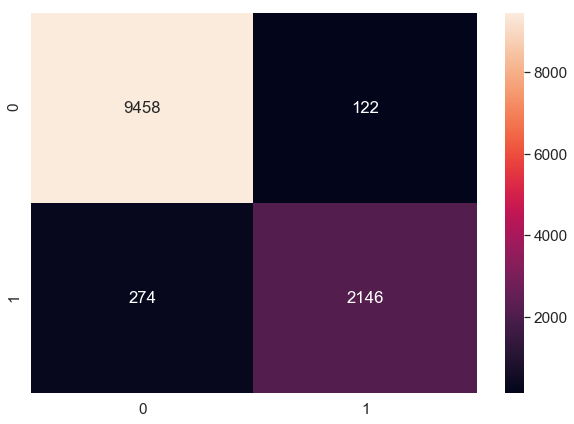

In [341]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## Step 3 - Generate predictions

In [349]:
# List of numerical features of test dataframe
temp_list = list(df_test.columns.values)

unwanted = ['x34', 'x35', 'x41', 'x45', 'x68', 'x93']
for i in unwanted:
    temp_list.remove(i)

# Filling the missing values with Mean for each numerical feature
for i in temp_list:
    df_test[i].fillna(value = df_test[i].mean(), inplace = True)
    
# Filling missing values with Mode for each categorical features
for i in unwanted:
    df_test[i].fillna(value = df_test[i].mode()[0], inplace = True)
    
# Cleaning feature x35
df_test['x35'] = df_test['x35'].map({'monday' : 'monday', 'tuesday': 'tuesday','wed': 'wednesday','wednesday':'wednesday',
                     'thur':'thurday','thurday':'thurday', 'friday':'friday', 'fri':'friday'})

# Clean the feature x41
df_test['x41'] = df_test['x41'].replace('[\$,]', '', regex=True).astype(np.float)

# Clean the feature x45
df_test['x45'] = df_test['x45'].replace('[\%,]', '', regex=True).astype(np.float)

# Exclude features x34, x35, x68, x93 from the df_test dataset and then create new testing dataframe
df_test_2 = df_test.drop(['x34','x35','x68','x93'], axis = 1)

# Now let's use One-hot Encoding method to create vectors for categorical data
x34_dummies = pd.get_dummies(df_test.x34, prefix = 'x34').iloc[:,1:]
x35_dummies = pd.get_dummies(df_test.x35, prefix = 'x35').iloc[:,1:]
x68_dummies = pd.get_dummies(df_test.x68, prefix = 'x68').iloc[:,1:]
x93_dummies = pd.get_dummies(df_test.x93, prefix = 'x93').iloc[:,1:]

# Then concatenate dummies to the end of df_train_2 and make a new_df_train
new_df_test = pd.concat([df_test_2, x34_dummies, x35_dummies, x68_dummies, x93_dummies], axis = 1)

# Separating out the features (from One-hot Encoded vectors)
x = df_test_2.values

x = StandardScaler().fit_transform(x)

# Create new dataframe based on pca analysis
pca = PCA()
pc = pca.fit_transform(x)
pc_df = pd.DataFrame(data = pc)

# Let's add One-hot Encoded vectors to the begining of pc_df 
X = pd.concat([new_df_test.iloc[:,97:], pc_df], axis = 1)

# Let's have look at X
X.head()

,x34_bmw,x34_chevrolet,x34_chrystler,x34_ford,x34_mercades,x34_nissan,x34_tesla,x34_volkswagon,x35_monday,x35_thurday,x35_tuesday,x35_wednesday,x68_Aug,x68_Dev,x68_Feb,x68_January,x68_July,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_sept.,x93_asia,x93_euorpe,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2.539013,-0.529019,1.086079,0.009703,-0.516235,0.249632,-1.821317,-2.882996,0.024009,-1.681793,-0.224235,0.414610,-1.771604,-0.444789,-1.189812,1.324236,0.678350,1.731389,-0.879222,-1.123492,2.167964,-0.361898,-1.327225,-0.754291,-0.557775,0.877754,0.941013,-0.361688,0.352694,-1.609598,-0.084626,1.163618,-1.395429,-0.624244,1.476663,-1.436729,-1.480810,-1.826467,-0.637165,0.790031,-0.084208,0.433367,2.234896,1.467294,0.147015,0.906826,-0.490607,0.109042,-0.441584,0.530799,-1.443189,-0.288223,0.082548,0.335219,0.556000,-2.035238,0.410215,-0.090826,-1.027552,0.211516,1.883289,-1.055348,0.579144,-0.003764,1.267992,0.047752,0.968766,-0.651757,-0.135603,0.012398,0.055693,1.318661,1.245223,2.944544,-1.771690,-0.648092,-0.498110,-0.496359,-0.968054,2.297821,0.116357,-0.520083,-0.416472,0.490797,1.047952,0.042739,-0.706031,-0.793053,-1.215645,-1.077276,-0.861023,-0.031173,-0.161691,0.047877,0.000766,0.000359
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,-0.966435,-1.926402,-0.661366,0.729406,-1.278746,0.684166,0.042501,-1.141969,0.044896,1.400542,-0.115633,-0.971636,1.028439,0.546513,-0.184857,-0.700290,0.913054,-0.166103,-0.906779,-1.027266,-0.470167,-1.626469,0.300898,1.447007,-0.697545,-0.462412,-0.641355,-0.413468,-0.275252,-0.917348,0.296760,-0.552527,0.157091,-0.247410,0.109530,-0.484182,-0.734004,-0.241484,0.427528,-0.526428,-1.393425,0.913277,0.342805,0.224366,0.544872,-0.745432,-0.534048,1.375406,0.784562,-0.198558,0.127150,0.252982,0.961567,0.335886,-2.091086,-1.142514,-0.289626,-0.924291,-0.285673,-0.658856,-0.538141,-1.201402,-0.291413,-0.349539,0.210175,-0.123186,-0.213178,0.034566,0.063832,-0.365252,-0.544068,-0.857428,1.485848,0.115249,-0.200176,-0.297136,0.090876,-0.398996,1.405423,-0.021401,0.441102,0.283392,-0.137192,-0.194684,0.063032,0.175174,0.048001,-0.469795,-0.540790,-0.206130,-0.032998,0.060550,0.204935,-0.073418,0.001467,0.000941
2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0.652465,-0.077925,1.485513,-2.571744,2.118262,-0.395870,-2.329767,1.032215,0.378040,0.877427,-1.284693,1.948275,-0.075424,-1.335240,-3.417415,-0.518965,0.127903,1.523627,2.091191,0.511866,-0.930106,-0.266303,1.719027,0.916392,-0.151757,0.059393,-0.140893,-0.626972,0.946208,-1.299279,-0.834479,1.380515,0.663375,-0.331986,0.395467,0.758727,0.843140,0.668133,-0.352748,-0.576853,0.282312,-0.779689,0.354602,1.151979,1.437273,0.564164,0.062566,0.296339,0.605295,2.011711,-0.461986,1.139015,1.029936,-0.326834,-0.314691,1.391114,-0.053013,0.731978,0.490518,0.860623,-0.797500,1.419673,2.412209,0.329773,-0.151882,1.512524,-0.965461,0.948049,0.948895,-0.258876,0.272933,-0.570131,-0.208733,0.097769,-0.698107,-0.871315,0.781155,0.320930,-1.012173,0.502859,0.303009,-1.470239,0.007065,-0.563594,0.469979,-0.205027,-0.051930,0.019997,0.517427,0.500656,-0.480008,-0.584692,-0.279626,0.052838,0.001019,0.002108
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.206400,0.031398,0.204930,-0.925342,-0.363939,0.020843,2.049384,1.616395,0.179417,1.842458,0.776125,-1.231776,0.738385,-2.121548,0.201239,0.105491,-0.518727,1.703464,1.209778,-1.140257,-1.013136,0.169977,-0.220443,0.419826,-0.488632,-0.672773,1.054995,1.978221,-0.479888,0.175441,1.605739,1.335140,0.273942,-0.118022,1.170671,-0.950857,0.539320,-0.688466,-0.146308,1.780794,0.001539,1.298471,0.288981,-0.973059,-0.063833,0.338798,-0.813665,0.971746,-0.010976,-1.018231,-1.207863,0.001400,0.381838,-1.194672,0.015806

In [350]:
# Use the forest's predict method on the test data
y_result_1 = rf_7.predict(X)

In [377]:
# Use the DNN's predict method on the test data
y_result_2 = model.predict(X)
y_result_2 = (y_result_2.round())

In [378]:
list =[]
for i in range(10000):
    list.append(y_result_2[i][0])
y_result_2 = np.array(list)

In [389]:
# Save Numpy array to csv
np.savetxt('result_1.csv', [y_result_1], delimiter=',', fmt='%d')

In [391]:
# Save Numpy array to csv
np.savetxt('result_2.csv', [y_result_2], delimiter=',', fmt='%d')

## Step 4 - Compare your modeling approaches:

Given the class skewness, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not always a reliable measure for comparing classification models.

In [342]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [343]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [344]:
from sklearn.ensemble import RandomForestClassifier

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


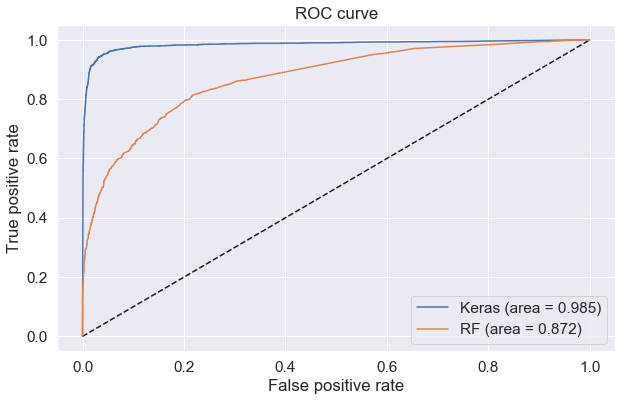

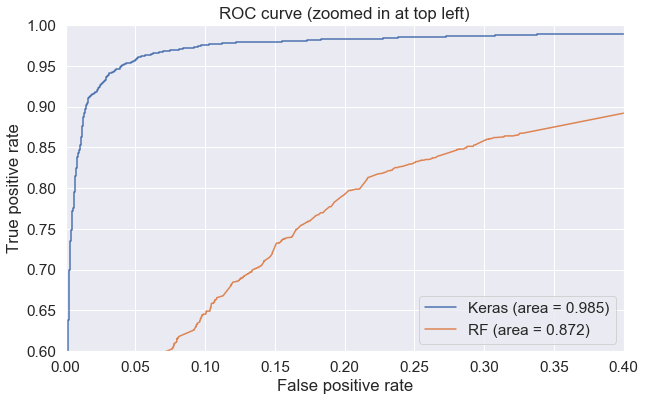

In [346]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Step 5 - Submit your work